# Demonstration of ESG module running in docker container

## Modelling stocks with GBM and rates with Ornstein–Uhlenbeck SDE <br>

In [1]:
import httpx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!docker run -d --name my_esg -p 8000:80 holmen1/economic-scenario-generator-api

docker: Error response from daemon: Conflict. The container name "/my_esg" is already in use by container "68aeab245f12de94fbdd559afa2a70de3672e70a92558316626630e265bf1795". You have to remove (or rename) that container to be able to reuse that name.
See 'docker run --help'.


if docker: Error response from daemon: Conflict. Just run the following command:


In [3]:
!docker start my_esg

my_esg


In [4]:
payload = {
    "samples": 100,
    "years": 15,
    "s0": [224.0, 244.0, 0.03],
    "a": [0.0, 0.0, 0.09],
    "mu": [0.094, 0.094, -0.007],
    "sigma": [0.16, 0.16, 0.007],
    "corrmatrix": [[1.0, 1.0, 0.2], [1.0, 1.0, 0.2], [0.2, 0.2, 1.0]]
}

Note that corrmatrix definitely is singular!

In [5]:
response = httpx.post("http://localhost:8000/api/scenarios", json=payload, timeout=10.0)

In [6]:
print(response)

<Response [201 Created]>


In [7]:
gbm = np.array(response.json()["gbm"])
vasicek = np.array(response.json()["vasicek"])

In [8]:
print(gbm.shape)
print(vasicek.shape)

(100, 2, 180)
(100, 1, 180)


# Stock

## $dS = \mu S dt + \sigma S dB$

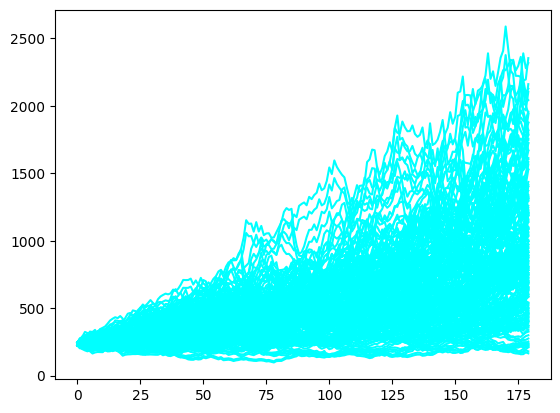

In [9]:
for s in gbm:
    plt.plot(s.T, color='cyan') 

# Interest rate
## $dr = a(\mu - r) dt + \sigma dB$

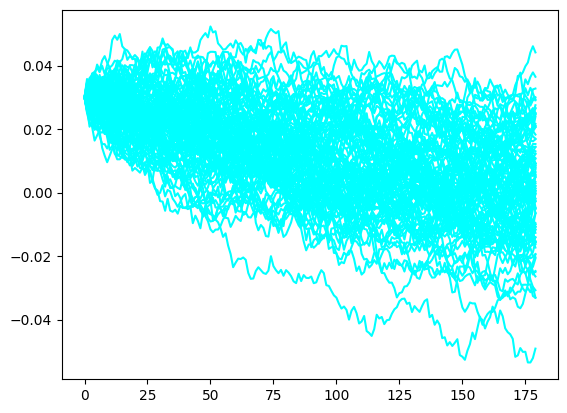

In [10]:
for r in vasicek:
    plt.plot(r.T, color='cyan')